In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from math import exp
import matplotlib.pyplot as plt

In [2]:
prec_file = "Precip.dat"
prec_df = pd.read_table(prec_file)
prec_arr = prec_df.values
prec_arr = prec_arr.reshape(prec_arr.size)
print(prec_arr)
print('Total sum (mm) =', (np.sum(prec_arr)))
prec_arr = prec_arr / 1000.0 # conversion to m/hour
prec_arr = prec_arr / 3600.

[ 0.   3.2  5.5  7.2  3.3  0.   0.   0.   0.   0.   0.   5.1  4.3  8.2
  3.2  1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  10.
 12.   0.   8.  10.   3.   0.   0.   0.   0.   0.   0.  10.   0.   0.
  0.   0.   0.   0.   0.   0.   0. ]
Total sum (mm) = 94.0


In [3]:
def analytical_solution(A, P, K, S_0, dt):
    '''
    ODE: dS/dt = I - (1/K)*S
    A - watershed area (m2),
    P - timeseries of precipitation rates, (m/h),
    K - response factor (h),
    S_0 - initial water volume in reservoir, (m3)
    dt - time step (h).
    '''    
    steps_num = len(P)
    S = np.empty(steps_num)
    Q = np.empty(steps_num)

    for i in range(steps_num):
        I = P[i] * A # m3 / per time unit
#         V_out = I * dt + (S_0 - K * I)*(1.0 - np.exp(-dt/K))
#         Q_t = V_out / dt
        S_t = K * I + (S_0 - K * I) * np.exp(-dt/K)
        Q_t = I - (S_t - S_0)/dt    
        S[i] = S_t
        Q[i] = Q_t
        S_0 = S_t
    return S, Q


def euler_explicit(A, P, K, S_0, dt):
    steps_num = len(P)
    S = np.empty(steps_num)
    Q = np.empty(steps_num)

    for i in range(steps_num):
        I = P[i] * A # m3 / per time unit
        Q_t = S_0 / K
        S_t = S_0 + dt * (I - Q_t)        
        S[i] = S_t
        Q[i] = Q_t
        S_0 = S_t
    return S, Q


def euler_explicit_modified(A, P, K, S_0, dt):
    S = np.empty(len(P))
    Q = np.empty(len(P))
    steps_num = int(3600./dt)
    
    for hour, p in enumerate(P):
        I = p * A # m3 / per time unit
        S_initial = S_0
        for i in range(steps_num):
            Q_t = S_0 / K
            S_t = S_0 + dt * (I - Q_t)        
            S_0 = S_t

        Q_avg = I - (S_t - S_initial)/3600.
        
        S[hour] = S_0
        Q[hour] = Q_avg
            
    return S, Q

In [4]:
# Previously, we worked with the following setup:
# S_0 = 1. # m3
# A = 1000 # m2
# dt = 1 # hours
# K = 3 # hours

S_0 = 0.0 # m3
# S_0 = 0.0 # m3
A = 1000000 # m2 ~ 1km2
dt = 3600 # sec
K = 3. * 3600 # sec. Convert K from hours to seconds! Very important!

S_a, Q_a = analytical_solution(A, prec_arr, K, S_0, dt)
S_ee, Q_ee = euler_explicit(A, prec_arr, K, S_0, dt)

balance_a = (np.sum(Q_a) * dt + S_a[-1])/(A * np.sum(prec_arr) * dt + S_0)
print('Water Balance, Analytical = ', balance_a)

balance_ee = (np.sum(Q_ee) * dt + S_ee[-1])/(A * np.sum(prec_arr) * dt + S_0)
print('Water Balance, Explicit Euler = ', balance_ee)

Water Balance, Analytical =  1.0
Water Balance, Explicit Euler =  1.0000000000000002


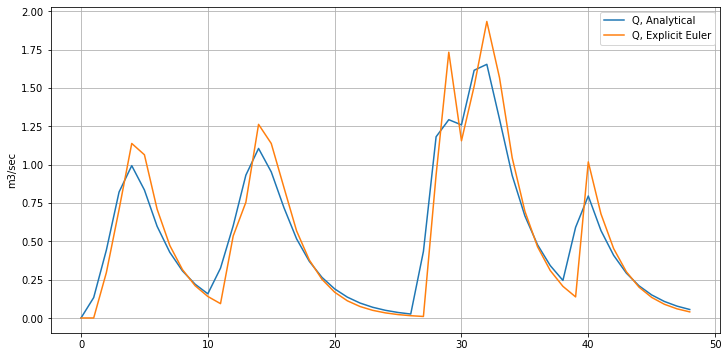

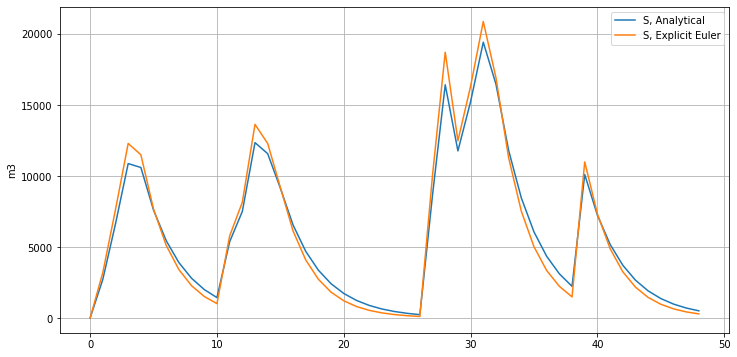

In [5]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

ax.plot(Q_a, label = 'Q, Analytical')
ax.plot(Q_ee, label = 'Q, Explicit Euler')
ax.set_ylabel('m3/sec')

ax.grid()
ax.legend()

############################################################################################################

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

ax.plot(S_a, label = 'S, Analytical')
ax.plot(S_ee, label = 'S, Explicit Euler')
ax.set_ylabel('m3')

ax.grid()
ax.legend()

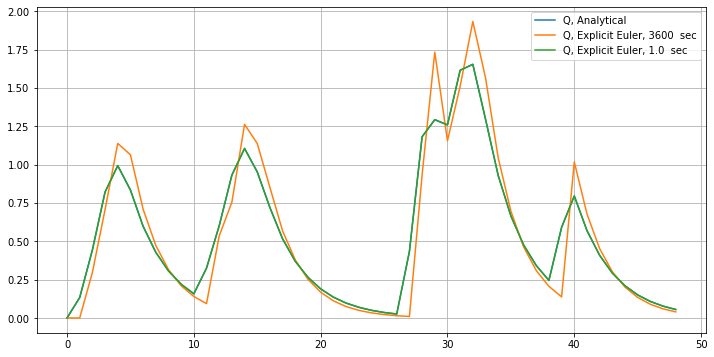

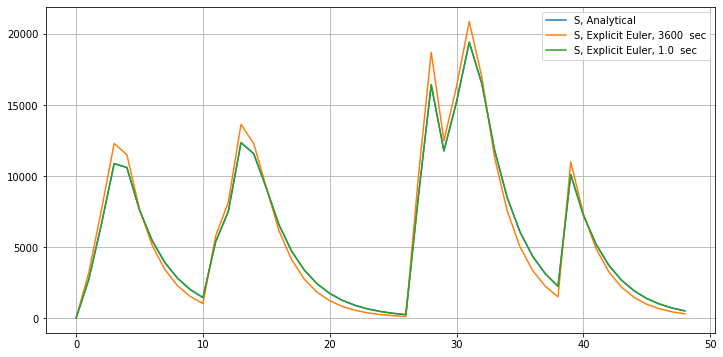

In [9]:
dt_ee = 1. # sec
S_ee_1, Q_ee_1 = euler_explicit_modified(A, prec_arr, K, S_0, dt_ee)

############################################################################################################
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

ax.plot(Q_a, label = 'Q, Analytical')
ax.plot(Q_ee, label = 'Q, Explicit Euler, ' + str(dt) + '  sec')
ax.plot(Q_ee_1, label = 'Q, Explicit Euler, ' + str(dt_ee) + '  sec')

ax.grid()
ax.legend()

############################################################################################################

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

ax.plot(S_a, label = 'S, Analytical')
ax.plot(S_ee, label = 'S, Explicit Euler, ' + str(dt) + '  sec')
ax.plot(S_ee_1, label = 'S, Explicit Euler, ' + str(dt_ee) + '  sec')

ax.grid()
ax.legend()

In [101]:
balance_a = (np.sum(Q_a) * dt + S_a[-1])/(A * np.sum(prec_arr) * dt + S_0)
print('Water Balance, Analytical = ', balance_a)

balance_ee = (np.sum(Q_ee_1) * dt + S_ee_1[-1])/(A * np.sum(prec_arr) * dt + S_0)
print('Water Balance, Explicit Euler = ', balance_ee)

Water Balance, Analytical =  1.0
Water Balance, Explicit Euler =  1.0
